In [79]:
# load the dataset
import pandas as pd
import numpy as np
import math as mt

pd.set_option('display.max_columns', 32)

df = pd.read_excel('C:/Users/anhai/Desktop/SMU/7331_Data_Mining/Data_Mining_7331/Data/mathdownload2018.xlsx')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148933 entries, 0 to 148932
Data columns (total 32 columns):
cds                 148933 non-null int64
rtype               148933 non-null object
schoolname          134824 non-null object
districtname        148916 non-null object
countyname          148916 non-null object
charter_flag        15685 non-null object
coe_flag            487 non-null object
dass_flag           7804 non-null object
studentgroup        148933 non-null object
currdenom           148933 non-null int64
currdenom_swd       10205 non-null float64
currstatus          97487 non-null float64
priordenom          148842 non-null float64
priordenom_swd      9952 non-null float64
priorstatus         96934 non-null float64
change              93435 non-null float64
statuslevel         148933 non-null int64
changelevel         148933 non-null int64
color               148933 non-null int64
box                 148933 non-null int64
hscutpoints         25661 non-null object

In [80]:
#parse out state records
dfX = df[df.rtype == "X"]

print(dfX.info())

#remove columns with no data
dfX = dfX.dropna(axis=1, how="all")

print(dfX.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 16
Data columns (total 32 columns):
cds                 17 non-null int64
rtype               17 non-null object
schoolname          0 non-null object
districtname        0 non-null object
countyname          0 non-null object
charter_flag        0 non-null object
coe_flag            0 non-null object
dass_flag           0 non-null object
studentgroup        17 non-null object
currdenom           17 non-null int64
currdenom_swd       1 non-null float64
currstatus          17 non-null float64
priordenom          17 non-null float64
priordenom_swd      1 non-null float64
priorstatus         17 non-null float64
change              17 non-null float64
statuslevel         17 non-null int64
changelevel         17 non-null int64
color               17 non-null int64
box                 17 non-null int64
hscutpoints         0 non-null object
curradjustment      1 non-null float64
prioradjustment     1 non-null float64
pairshare

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
        cds     currdenom  currdenom_swd  currstatus    priordenom  \
count  17.0  1.700000e+01            1.0   17.000000  1.700000e+01   
mean    0.0  7.425339e+05       361212.0  -51.100000  7.474793e+05   
std     0.0  9.059385e+05            NaN   49.352444  9.100511e+05   
min     0.0  1.484900e+04       361212.0 -125.300000  1.538300e+04   
25%     0.0  1.152670e+05       361212.0  -81.000000  1.112850e+05   
50%     0.0  3.966070e+05       361212.0  -65.800000  3.900350e+05   
75%     0.0  9.998850e+05       361212.0  -25.200000  1.020711e+06   
max     0.0  3.166312e+06       361212.0   56.700000  3.195814e+06   

       priordenom_swd  priorstatus     change  statuslevel  changelevel  \
count             1.0    17.000000  17.000000    17.000000         17.0   
mean         353367.0   -52.158824   1.064706     2.294118          3.0

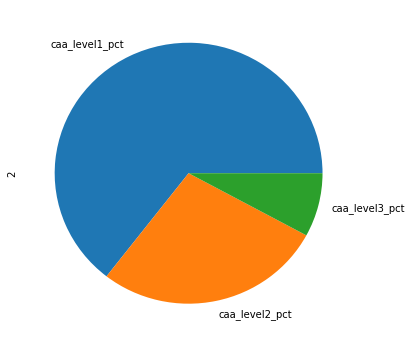

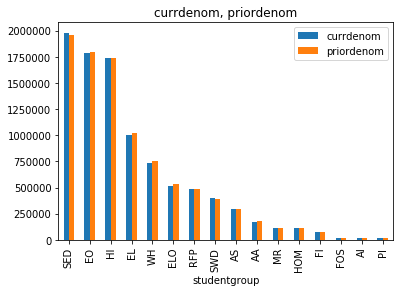

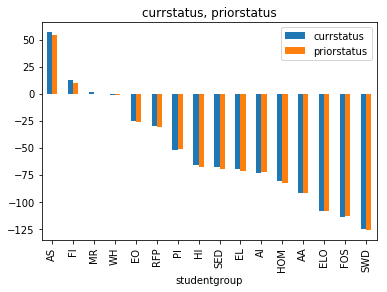

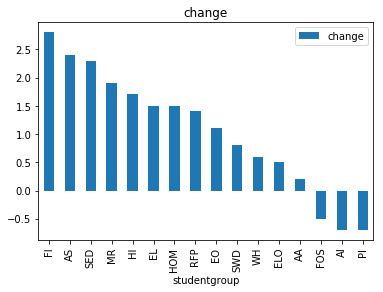

In [92]:
#plot a pie chart of students' achievement levels in math
pct = ["caa_level1_pct", "caa_level2_pct", "caa_level3_pct"]
print(dfX.loc[2,pct].plot.pie(figsize=(6, 6)))

def barchart(col):
    print(dfX.loc[dfX.studentgroup != "ALL",col].sort_values(ascending = False, by=col[1])\
    .plot.bar(x=col[0], y=col[1:], title=", ".join(col[1:])))
    

#plot number of students that took the assement in the current year and prior year, grouped by student groups
col = ["studentgroup","currdenom","priordenom"]
barchart(col)

#plot status current year and prior year, grouped by student groups
col = ["studentgroup","currstatus","priorstatus"]
barchart(col)

#plot status change for each student groups
col = ["studentgroup","change"]
barchart(col)

print(dfX.describe(include = [np.number]))



In [76]:
#parse out district records
dfD = df[df.rtype == "D"]

print(dfD.info())

#remove columns with no data
dfD = dfD.dropna(axis=1, how="all")

print(dfD.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14092 entries, 17 to 148915
Data columns (total 32 columns):
cds                 14092 non-null int64
rtype               14092 non-null object
schoolname          0 non-null object
districtname        14092 non-null object
countyname          14092 non-null object
charter_flag        0 non-null object
coe_flag            487 non-null object
dass_flag           0 non-null object
studentgroup        14092 non-null object
currdenom           14092 non-null int64
currdenom_swd       951 non-null float64
currstatus          10452 non-null float64
priordenom          14092 non-null float64
priordenom_swd      938 non-null float64
priorstatus         10495 non-null float64
change              10210 non-null float64
statuslevel         14092 non-null int64
changelevel         14092 non-null int64
color               14092 non-null int64
box                 14092 non-null int64
hscutpoints         1159 non-null object
curradjustment      1035 n

In [112]:
#parse out school records
dfS = df[df.rtype == "S"] 

print(dfS.info())
print(dfS.head())

#remove columns with no data
dfS = dfS.dropna(axis=1, how="all")

print(dfS.info())
print(dfS.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134824 entries, 30 to 148932
Data columns (total 32 columns):
cds                 134824 non-null int64
rtype               134824 non-null object
schoolname          134824 non-null object
districtname        134824 non-null object
countyname          134824 non-null object
charter_flag        15685 non-null object
coe_flag            0 non-null object
dass_flag           7804 non-null object
studentgroup        134824 non-null object
currdenom           134824 non-null int64
currdenom_swd       9253 non-null float64
currstatus          87018 non-null float64
priordenom          134733 non-null float64
priordenom_swd      9013 non-null float64
priorstatus         86422 non-null float64
change              83208 non-null float64
statuslevel         134824 non-null int64
changelevel         134824 non-null int64
color               134824 non-null int64
box                 134824 non-null int64
hscutpoints         24502 non-null object
c